# 02. EDA, Exploratory Data Analysis

* EDA(ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù)Ïù¥ÎûÄ, ÏöîÏïΩ Î∞è ÏãúÍ∞ÅÌôî Îì±ÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ìï¥ÌïòÎäî Í≥ºÏ†ïÏùÑ ÎßêÌïúÎã§.

In [2]:
import pandas as pd 
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from review_analyzer import *

# rc('font', family='AppleGothic') # Mac 
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [7]:
data_path = "data/naver_review_preprocessing.csv"
data = pd.read_csv(data_path, parse_dates=["date"], encoding="CP949")
data.head(5)

reviewer                                             review       date  \
0     shooooooo                                  Ï¢ÖÎ•òÎèÑ ÏïåÏ∞®Í≤å ÎßéÍ≥† Îã§ ÎßõÏûàÏñ¥Ïöî 2024-06-07   
1          Ï•¥Î¶¨08  Ïª§ÌîºÎûë Î∏åÎü∞ÏπòÌÅ¨Î¶ºÌååÏä§ÌÉÄ Î®πÏóàÏñ¥Ïöî Ïò§ÎäòÎî∞Îùº ÌååÏä§ÌÉÄÍ∞Ä Î∂àÏñ¥ÏÑúÎÇòÏôîÎçîÎùºÍµ¨Ïöî Ïó≠Ïãú Ïã†Îùº Ïª§Ìîº... 2024-05-23   
2  illiiilillil  ÏßÅÏõêÎ∂ÑÎì§ ÎÑàÎ¨¥ ÏπúÏ†àÌïòÏãúÍ≥† ÏùåÏãùÎßõÏùÄ ÎåÄÌïúÎØºÍµ≠ Ìò∏ÌÖîÎ∂ÄÌéò ÎÑòÎ≤ÑÏõêÏù∏Îç∞ ÎßêÌï¥Î≠êÌï¥ ÏûÖÎãàÎã§ Ï°∞Í∏à... 2024-05-19   
3      DEAN KIL                                           ÎπÑÏã∏ÏßÄÎßå Ï¢ãÏùÄÍ≥≥ 2024-05-04   
4          Ïù¥ÏßÑÏö±Ï®©                                   Ìï≠ÏÉÅ ÏπúÏ†àÌïòÏãúÍ≥† ÏùåÏãùÎèÑÎßõÏûàÎÑ§Ïöî 2024-04-21   

  weekday  
0     Í∏àÏöîÏùº  
1     Î™©ÏöîÏùº  
2     ÏùºÏöîÏùº  
3     ÌÜ†ÏöîÏùº  
4     ÏùºÏöîÏùº

## 1. Ïû¨Î∞©Î¨∏Ïóê ÎåÄÌïú Î∂ÑÏÑù

- ÏùòÍ≤¨Ïù¥ ÌÅ¨Í≤å Î∞òÏ†ÑÏúºÎ°ú Îã¨ÎùºÏßÄÎäî ÏùòÍ≤¨ÏùÄ ÏóÜÏóàÎã§. 
- Ïû¨Î∞©Î¨∏ÏùÑ Ìïú ÏÇ¨ÎûåÏù¥ ÎßéÏù¥ ÏïäÏïÑÏÑú ÏùºÎ∞òÌôî ÌïòÍ∏∞ÏóêÎäî Ïñ¥Î†§ÏõÄÏù¥ ÏûàÎã§.

In [8]:
revisitor_data = data["reviewer"].value_counts()
revisitor = revisitor_data[revisitor_data > 1].index
revisited_data = data.loc[data["reviewer"].isin(revisitor),:].sort_values(by=["reviewer"])
print(revisited_data.shape)
revisited_data

(14, 4)


reviewer                                             review       date  \
20   ERANGMAM  Ïï†Í∏∞Í∞Ä Ïä§ÌÖåÏù¥ÌÅ¨ ÎÑàÎ¨¥ ÏûòÎ®πÏóàÏñ¥Ïöî Ïñ∏Ï†úÎÇò ÎçîÌååÌÅ¨Î∑∞Îäî Ìù†Ïù¥ÏóÜÏñ¥Ïöî ÏπúÏ†àÌï®Í≥º ÏãùÏÇ¨Ïùò ÌíàÏßàÏùÄ... 2024-01-03   
192  ERANGMAM  ÌäπÎ≥ÑÌïúÎÇ† Î∞©Î¨∏ÌïòÍ∏∞ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî ÏùåÏãùÎèÑ Ìï≠ÏÉÅ Ïã†ÏÑ†ÌïòÍ≥† ÎßõÏûàÍ≥† Î¨¥ÏóáÎ≥¥Îã§ ÏßÅÏõêÎì§ ÎÑàÎ¨¥ Ïπú... 2022-02-05   
302   noeulll              ÎîîÎÑàÎßå ÏûêÏ£º Í∞ÄÎã§Í∞Ä Î∏åÎü∞Ïπò Ïò§ÎûúÎßåÏóê Í∞ìÎäîÎç∞ ÏòàÏ†ÑÎßå Î™ªÌïòÏßÄÎßå Í¥úÏ∞ÆÎÑ§Ïöî 2020-06-17   
303   noeulll             Ï†ïÎßê ÏôÑÎ≤ΩÌïú ÏÑúÎπÑÏä§ÏûÖÎãàÎã§ Í∑ºÎç∞ ÎßõÏù¥ ÏòàÏ†ÑÎßå Î™ªÌïòÎÑ§Ïöî Í∑∏ÎûòÎèÑ ÎßåÏ°±Ìï©ÎãàÎã§ 2020-05-27   
19      ÎÇòÎùºÎÇò57                                    ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Î∂ÑÏúÑÍ∏∞ Ï¢ãÏäµÎãàÎã§ 2024-01-05   
40      ÎÇòÎùºÎÇò57                                          Îã§ÏùåÏóê ÎòêÍ∞àÍ±∞ÏóêÏöî 2023-10-28   
157    Ïò§Ïòà3337                                   ÎÑò ÎßõÏûàÏñ¥Ïöî Í∏∞ÎÖêÏùºÏóê Íº≠ Í∞ïÏ∂î 2022-06-03   
158    Ïò§Ïòà3337                                     ÏÑúÎπÑÏä§Í∞Ä ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî ÍµøÍµø 2022-06-03   
4        Ïù¥ÏßÑÏö±Ï®©                                   Ìï≠ÏÉÅ ÏπúÏ†àÌïòÏãúÍ≥† ÏùåÏãùÎèÑÎßõÏûàÎÑ§Ïöî 2024-04-21   
30       Ïù¥ÏßÑÏö±Ï®©                         ÎÑàÎ¨¥ÏπúÏ†à ÏùåÏãùÎèÑ ÎÑàÎ¨¥ÎßõÏûàÏñ¥Ïö§ Ïó≠Ïãú Ïã†ÎùºÌò∏ÌÖî Ï≤¥Í≥† 2023-11-19   
151      ÏßÄÏúµ50                             ÎëêÎ≤àÏß∏ Î∞©Î¨∏ Ïó¨Ï†ÑÌûà ÎßõÏûàÍ≥† ÏÇ¨ÎûåÏùÄ ÎßéÏïÑÏöî 2022-06-11   
225      ÏßÄÏúµ50                         Í∞ÄÏ°±Îì§Í≥º Î∞©Î¨∏ÌñàÏñ¥Ïöî ÌäπÎ≥ÑÌïúÎÇ† Ï¢ãÏùÄ ÏÇ¨ÎûåÎì§Í≥º Ìï®Íªò 2021-09-11   
77     Ï´ëÏù¥2472  ÏïÑÍ∏∞ ÏÉùÏùºÏù¥Îùº Í∞ÄÏ°±Îì§ Î£∏ÏòàÏïΩÌï¥ÏÑú Îã§ÎÖÄÏôîÎäîÎç∞ Ïò®ÎùºÏù∏ ÏòàÏïΩÏúºÎ°ú ÏÑ±Í≥µÌñàÏñ¥Ïöî ÏùåÏãùÎèÑ ÎßõÏûàÏóà... 2023-04-07   
176    Ï´ëÏù¥2472  Í∞ÄÍ≤©ÏùÄ Ïò¨ÎûêÏßÄÎßå ÎßõÏûàÍ≥† ÏπúÏ†àÌñàÏäµÎãàÎã§ ÌèâÏùº Ï†êÏã¨Ïóê Í∞ÄÎãà ÎîîÎÑàÏôÄ Ï£ºÎßêÏóê ÎπÑÌï¥ ÏÇ¨ÎûåÏù¥ Î∂ê... 2022-04-04   

    weekday  
20      ÏàòÏöîÏùº  
192     ÌÜ†ÏöîÏùº  
302     ÏàòÏöîÏùº  
303     ÏàòÏöîÏùº  
19      Í∏àÏöîÏùº  
40      ÌÜ†ÏöîÏùº  
157     Í∏àÏöîÏùº  
158     Í∏àÏöîÏùº  
4       ÏùºÏöîÏùº  
30      ÏùºÏöîÏùº  
151     ÌÜ†ÏöîÏùº  
225     ÌÜ†ÏöîÏùº  
77      Í∏àÏöîÏùº  
176     ÏõîÏöîÏùº

## 2. ÏãúÍ∏∞Î≥Ñ Î¶¨Î∑∞ Î∂ÑÏÑù

* 22ÎÖÑÏóê Î¶¨Î∑∞ ÌôúÎèôÏù¥ Í∞ÄÏû• ÌôúÎ∞úÌñàÏúºÎ©∞ 23ÎÖÑÏóê Ï§ÑÏñ¥Îì¶

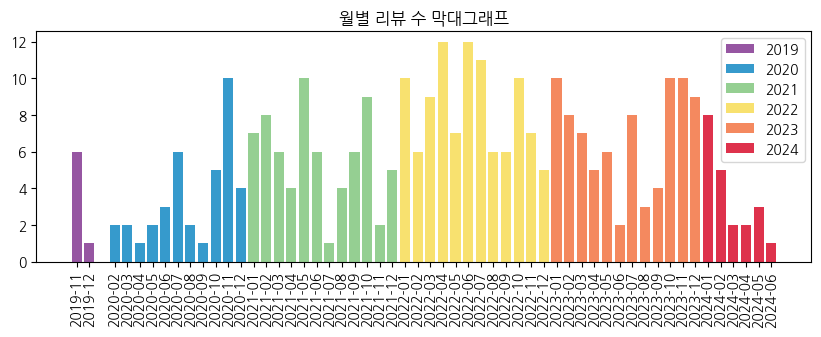

In [9]:
# ÏõîÎ≥Ñ Î¶¨Î∑∞ Ïàò ÌååÏïÖÌïòÍ∏∞
palette = {"2019": "#9656a2", "2020": "#369acc", "2021": "#95cf92", "2022": "#f8e16f", "2023": "#f4895f", "2024": "#de324c"}
draw_barplot_by_period(data, "M", palette=palette)

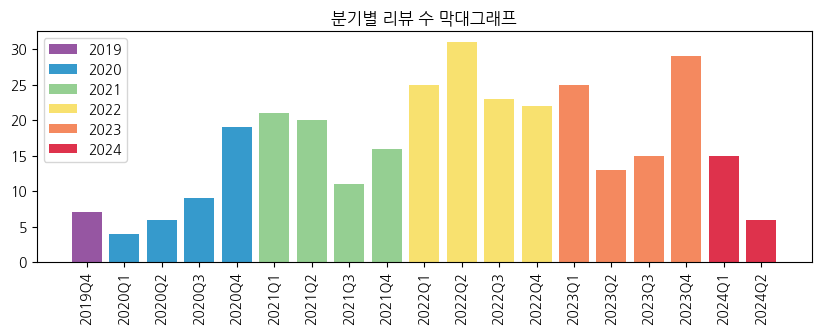

In [10]:
# Î∂ÑÍ∏∞Î≥Ñ Î¶¨Î∑∞ Ïàò ÌååÏïÖÌïòÍ∏∞
draw_barplot_by_period(data, "Q", palette=palette)

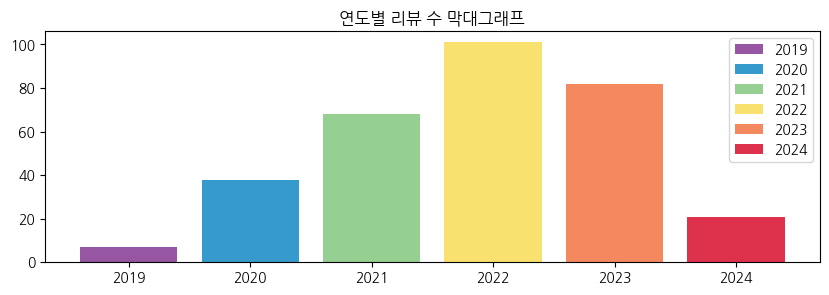

In [11]:
# Ïó∞ÎèÑÎ≥Ñ Î¶¨Î∑∞ Ïàò ÌååÏïÖÌïòÍ∏∞
draw_barplot_by_period(data, "Y", rot=0, palette=palette)

## 3. ÏöîÏùºÎ≥Ñ Î¶¨Î∑∞ Î∂ÑÏÑù

* ÏòàÏÉÅÌïúÎåÄÎ°ú Í∏à, ÌÜ†, ÏùºÏóê Í∞ÄÏû• ÌôúÎ∞úÏù¥ Î∞©Î¨∏Ïù¥ Ïù¥Î£®Ïñ¥ÏßÑ Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

In [12]:
weekday_data = data["weekday"].value_counts()
weekday_data

weekday
ÌÜ†ÏöîÏùº    80
ÏùºÏöîÏùº    75
Í∏àÏöîÏùº    46
Î™©ÏöîÏùº    38
ÏàòÏöîÏùº    29
ÏõîÏöîÏùº    29
ÌôîÏöîÏùº    20
Name: count, dtype: int64

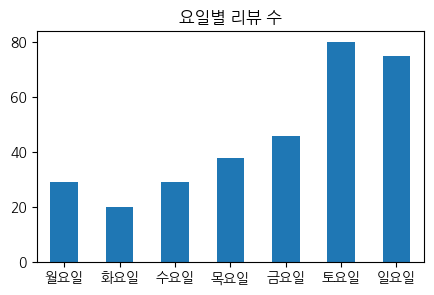

In [13]:
fig, ax = plt.subplots(figsize=(5, 3))
weekdays = ["ÏõîÏöîÏùº","ÌôîÏöîÏùº","ÏàòÏöîÏùº","Î™©ÏöîÏùº","Í∏àÏöîÏùº","ÌÜ†ÏöîÏùº","ÏùºÏöîÏùº"]
weekday_data[weekdays].plot(ax=ax, kind="bar")

# title ÏÑ§Ï†ï
ax.set(title="ÏöîÏùºÎ≥Ñ Î¶¨Î∑∞ Ïàò", xlabel="")
# xÏ∂ï ÏöîÏÜå ÎùºÎ≤® ÏÑ§Ï†ï
for label in ax.get_xticklabels():
    label.set_rotation(0)
    label.set_horizontalalignment('center')

plt.show()

## 2. ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú

* ÏõåÎìú ÌÅ¥ÎùºÏö∞ÎìúÎäî ÎààÏóê ÎùÑÎäî ÌÇ§ÏõåÎìúÎ•º Ï∞æÎäî Î™©Ï†ÅÏúºÎ°ú ÏÇ¨Ïö©ÌñàÎã§. 
* Ï†úÏô∏Ìïú ÎÇ¥Ïö©
    * Í∞ÄÍ≤å Ïù¥Î¶ÑÏù¥ÎÇò Î¶¨Î∑∞ Î∂ÑÏÑùÏóê ÎèÑÏõÄÏù¥ ÎêòÏßÄ ÏïäÎäî ÏùºÎ∞òÏ†ÅÏù∏ Îã®Ïñ¥Îì§ Ï†úÏô∏
    * ÎπàÎèÑÏàòÍ∞Ä 1Í∞úÏù∏ Í≤ΩÏö∞ Ï†úÏô∏

In [8]:
# Ïª§Ïä§ÌÖÄÌïú ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú
def draw_wordcloud_by_period(data, title):
    wordcloud = WordCloudTool(
        data=data, 
        exclude_words=["Î∑îÌéò", "ÏùåÏãù", "Ìò∏ÌÖî", "Ïã†Îùº", "ÌååÌÅ¨Î∑∞"]
    )

    wordcloud.draw(
        group="all", 
        titles=[f"{title} Ïö©Ïñ∏(N) ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú", f"{title} Ï≤¥Ïñ∏(V) ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú"],
        crange=(1, np.inf),
        min_length=2
    )

    return wordcloud.word_dict

In [9]:
data_path = "data/naver_review_tokenizing.csv"
tk_data = pd.read_csv(data_path, parse_dates=["date"], encoding="CP949")
tk_data.head(5)

reviewer       date weekday  \
0     shooooooo 2024-06-07     Í∏àÏöîÏùº   
1          Ï•¥Î¶¨08 2024-05-23     Î™©ÏöîÏùº   
2  illiiilillil 2024-05-19     ÏùºÏöîÏùº   
3      DEAN KIL 2024-05-04     ÌÜ†ÏöîÏùº   
4          Ïù¥ÏßÑÏö±Ï®© 2024-04-21     ÏùºÏöîÏùº   

                                              review  \
0                                  Ï¢ÖÎ•òÎèÑ ÏïåÏ∞®Í≤å ÎßéÍ≥† Îã§ ÎßõÏûàÏñ¥Ïöî   
1  Ïª§ÌîºÎûë Î∏åÎü∞ÏπòÌÅ¨Î¶ºÌååÏä§ÌÉÄ Î®πÏóàÏñ¥Ïöî Ïò§ÎäòÎî∞Îùº ÌååÏä§ÌÉÄÍ∞Ä Î∂àÏñ¥ÏÑúÎÇòÏôîÎçîÎùºÍµ¨Ïöî Ïó≠Ïãú Ïã†Îùº Ïª§Ìîº...   
2  ÏßÅÏõêÎ∂ÑÎì§ ÎÑàÎ¨¥ ÏπúÏ†àÌïòÏãúÍ≥† ÏùåÏãùÎßõÏùÄ ÎåÄÌïúÎØºÍµ≠ Ìò∏ÌÖîÎ∂ÄÌéò ÎÑòÎ≤ÑÏõêÏù∏Îç∞ ÎßêÌï¥Î≠êÌï¥ ÏûÖÎãàÎã§ Ï°∞Í∏à...   
3                                           ÎπÑÏã∏ÏßÄÎßå Ï¢ãÏùÄÍ≥≥   
4                                   Ìï≠ÏÉÅ ÏπúÏ†àÌïòÏãúÍ≥† ÏùåÏãùÎèÑÎßõÏûàÎÑ§Ïöî   

                                                N              V  
0                                              Ï¢ÖÎ•ò     ÏïåÏ∞®Îã§ ÎßéÎã§ ÎßõÏûàÎã§  
1                         Ïª§Ìîº Î∏åÎü∞Ïπò ÌÅ¨Î¶º ÌååÏä§ÌÉÄ ÌååÏä§ÌÉÄ Ïã†Îùº Ïª§Ìîº  Î®πÎã§ Î∂àÎã§ ÎÇòÏò§Îã§ ÎßõÏûàÎã§  
2  ÏßÅÏõê ÏπúÏ†à ÏùåÏãù Îßõ ÎåÄÌïúÎØºÍµ≠ Ìò∏ÌÖî Î∂ÄÌéò ÎÑòÎ≤ÑÏõê Î≠ê Ï°∞Í∏à ÏûÖÏû• ÏúµÌÜµ Í±∞ ÏùºÎ•ò Íµ¨ÏÉâ Í±∞  Ïù¥Îã§ Ï¢ãÎã§ ÏïÑÏâΩÎã§ ÏïΩÌïòÎã§  
3                                               Í≥≥         ÎπÑÏã∏Îã§ Ï¢ãÎã§  
4                                           ÏπúÏ†à ÏùåÏãù            ÎßõÏûàÎã§

### 1) Ï†ÑÏ≤¥

* Ïö©Ïñ∏ÏóêÏÑúÎäî ÌÅ¨Í≤å ÏùåÏãù, ÏÑúÎπÑÏä§, ÌôòÍ≤Ω(Ï£ºÏ∞®, Î∂ÑÏúÑÍ∏∞ Îì±)ÏúºÎ°ú ÎÇòÎà†ÏßÄÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§
* Ï≤¥Ïñ∏ÏóêÏÑúÎäî ÎåÄÎ∂ÄÎ∂Ñ Í∏çÏ†ïÏù¥ÎÇò, "Îã¨Îã§", "ÏãùÎã§", "ÎπÑÏã∏Îã§" Îì±Ïùò ÏÜåÏàòÏùò ÏùòÍ≤¨Ïù¥ Î≥¥Ïù∏Îã§. 

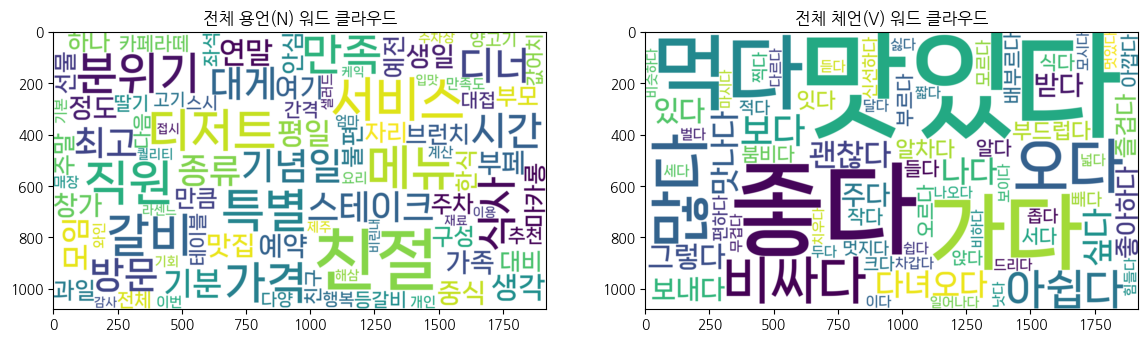

In [10]:
wordcloud_total = draw_wordcloud_by_period(tk_data, title="Ï†ÑÏ≤¥")

In [22]:
# Ïã§Ï†ú Î¶¨Î∑∞ Í≤ÄÏÉâÌï¥Î≥¥Í∏∞
search = search_review(tk_data, column="V", keyword="ÏïÑÏâΩÎã§")
for review in search["review"]:
    print(review)
    print("="*100)

ÏßÅÏõêÎ∂ÑÎì§ ÎÑàÎ¨¥ ÏπúÏ†àÌïòÏãúÍ≥† ÏùåÏãùÎßõÏùÄ ÎåÄÌïúÎØºÍµ≠ Ìò∏ÌÖîÎ∂ÄÌéò ÎÑòÎ≤ÑÏõêÏù∏Îç∞ ÎßêÌï¥Î≠êÌï¥ ÏûÖÎãàÎã§ Ï°∞Í∏àÏî© ÏùºÏ∞ç ÏûÖÏû• ÏãúÏºúÏ£ºÏãúÎäî ÏúµÌÜµÏÑ±ÎèÑ Ï¢ãÏïÑÏöî Ï¨êÎÅî ÏïÑÏâ¨Ïö¥Í±¥ ÏùòÏô∏Î°ú Í≥ºÏùºÎ•ò Íµ¨ÏÉâÏù¥ ÏïΩÌïòÎã§Îäî Í±∞
ÌèâÏùº Î∏åÎü∞Ïπò Îã§ÎÖÄÏôîÎäîÎç∞ Í∏àÏöîÏùºÏù¥Îùº Í∑∏Îü∞ÏßÄ ÏÇ¨Îûå ÏóÑÏ≤≠ ÎßéÎÑ§Ïöî ÎåÄÍ≤å ÏØîÎûÄÏñëÎÖêÎì±Í∞àÎπÑ ÌîºÏπ∏ÌååÏù¥ Îî∏Í∏∞ ÌäπÌûà ÎßõÏûàÎçò Í≤É Í∞ôÏäµÎãàÎã§ Ï¢åÏÑù Í∞ÑÍ≤©Ïù¥ Ï¢Ä Ï¢ÅÍ≥† ÏòÜ Ï¢åÏÑù Ïù¥ÏïºÍ∏∞Í∞Ä ÎÑàÎ¨¥ Ïûò Îì§Î¶¨Îäî Í≤ÉÏùÄ Ï¢Ä ÏïÑÏâ¨Ïõ†Ïñ¥Ïöî
Î™áÎ≤à Í∞àÎïå ÎßàÎã§ Îäò ÌÖåÏù¥Î∏îÏù¥ ÌòëÏÜåÌïúÍ≤å Í∞ÄÏû• ÏïÑÏâΩÏßÄÎßå 22Ïùº ÏÉùÏùºÏù¥Îùº ÎîîÎÑàÎ°ú Í∞îÎäîÎç∞ ÏÑúÎπÑÏä§ÎèÑ Î©îÎâ¥ÎèÑ ÎåÄÎßåÏ°± ÏûÖÎãàÎã§
Î≤†Ïä§Ìä∏ Î©îÎâ¥Îäî ÏñëÍ∞àÎπÑÏòÄÏäµÎãàÎãπ ÏïàÏã¨Ïä§ÌÖåÏù¥ÌÅ¨ Ìöå ÎåÄÍ≤åÎèÑ ÏßÑÏßú Î∞∞ÌÑ∞ÏßÄÍ≤å Î®πÏóàÎÑ§Ïöî Í∑∏Î¶¨Í≥† Îî§ÏÑ¨Î•òÎèÑ ÏùÄÍ∑º Î≥ÑÎØ∏ÏóêÏöî ÎßâÌåêÏóê Î∞∞Î∂àÎü¨ÏÑú ÎîîÏ†ÄÌä∏ ÎßéÏù¥ Î™ªÎ®πÏùÄÍ≤å ÏïÑÏâΩÎÑ§Ïöî Ïã†Îùº ÎçîÌååÌÅ¨Î∑∞ ÏµúÍ≥†
ÏßÅÏõêÎ∂ÑÎì§ ÏπúÏ†àÌïòÍ≥† ÏùåÏãùÎì§ Îã§ ÎßõÏûàÏñ¥Ïöî ÌäπÌûà ÏÉêÎü¨Îìú ÌååÌä∏ÏóêÏÑúÎäî ÌîºÏ°∞Í

### 2) Ïó∞ÎèÑÎ≥Ñ

* 22ÎÖÑÍ≥º 23ÎÖÑÏùò ÏùòÍ≤¨ÏùÄ ÎåÄÎ∂ÄÎ∂Ñ ÎèôÏùºÌïú Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.
* Í≤πÏπòÎäî Í≤å ÎßéÏïÑÏÑú Ï∞®Ïù¥Î•º ÌôïÏù∏Ìï† Ïàò ÏóÜÎã§.

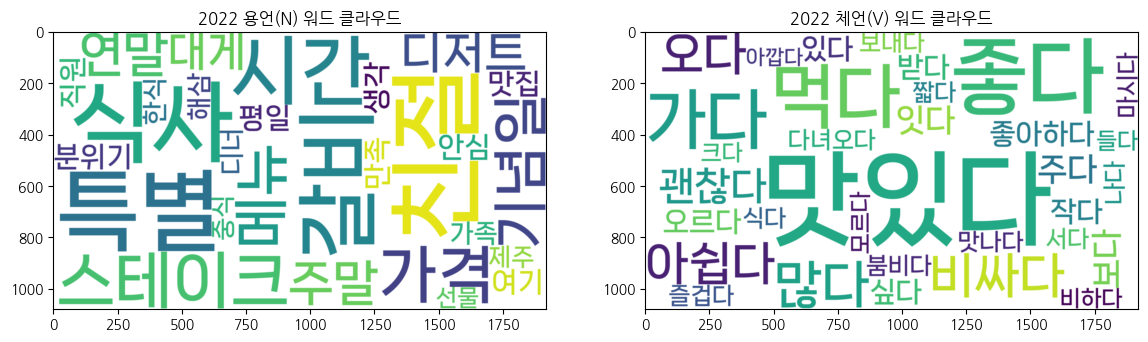

In [11]:
by_year = tk_data[tk_data["date"].dt.year==2022]
wordcloud22 = draw_wordcloud_by_period(by_year, title="2022")

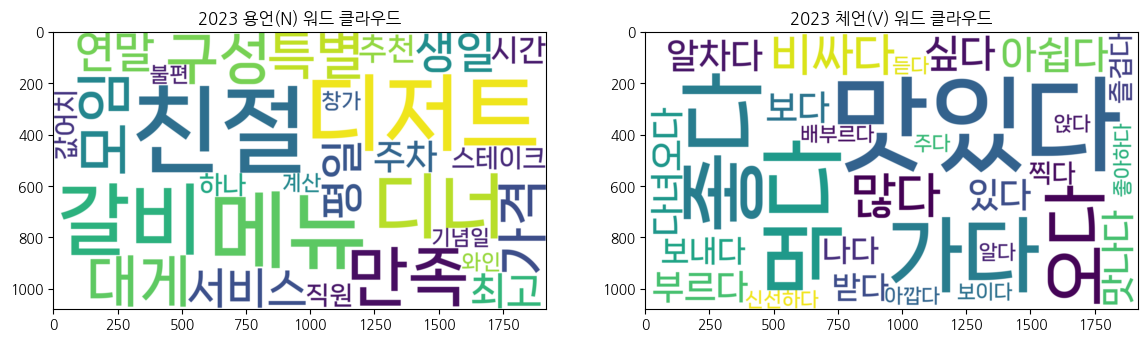

In [12]:
by_year = tk_data[tk_data["date"].dt.year==2023]
wordcloud23 = draw_wordcloud_by_period(by_year, title="2023")

### 3) ÌÇ§ÏõåÎìú Ï∞®Ïù¥ ÎπÑÍµê

* ÏãúÍ∏∞Î≥Ñ Î¶¨Î∑∞ Î∂ÑÏÑùÏóêÏÑú 22ÎÖÑÏóê Í∞ÄÏû• Î¶¨Î∑∞Í∞Ä ÌôúÎ∞úÌïú Í≤ÉÏúºÎ°ú Î≥¥ÏòÄÏßÄÎßå, ÌëúÌòÑÏùÄ 23ÎÖÑÏù¥ Îçî Íµ¨Ï≤¥Ï†ÅÏù∏ Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.
* Î¶¨Î∑∞ Î∞òÏùë ÎòêÌïú 22ÎÖÑÎ≥¥Îã§ 23ÎÖÑÏù¥ Îçî Ï¢ãÏùÄ Í≤É Í∞ôÎã§

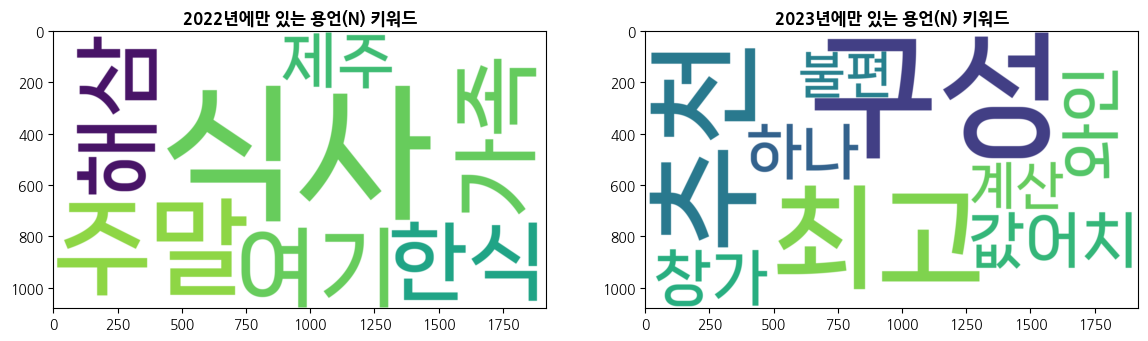

In [13]:
compareN = compare_wordcloud(
    wordcloud22,
    wordcloud23,
    column="N",
    titles = ["2022", "2023"]
)

In [14]:
compareN

{0: {'ÏãùÏÇ¨': 7, 'Ï£ºÎßê': 3, 'Ïó¨Í∏∞': 2, 'Í∞ÄÏ°±': 2, 'Ìï¥ÏÇº': 2, 'ÌïúÏãù': 2, 'Ï†úÏ£º': 2},
 1: {'Íµ¨ÏÑ±': 3,
  'ÏµúÍ≥†': 2,
  'Ï∂îÏ≤ú': 2,
  'Í∞íÏñ¥Ïπò': 2,
  'ÌïòÎÇò': 2,
  'Ï∞ΩÍ∞Ä': 2,
  'ÏôÄÏù∏': 2,
  'Í≥ÑÏÇ∞': 2,
  'Î∂àÌé∏': 2}}

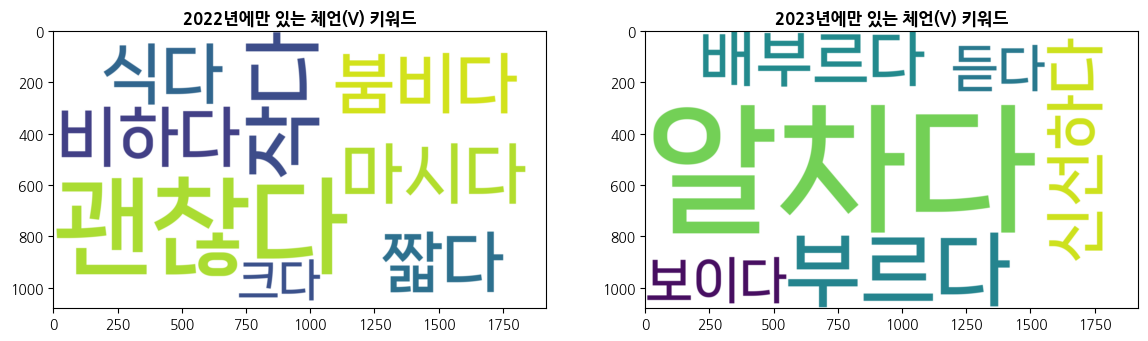

In [15]:
compareV = compare_wordcloud(
    wordcloud22,
    wordcloud23,
    column="V",
    titles = ["2022", "2023"]
)

In [17]:
compareV

{0: {'ÏãùÎã§': 2,
  'ÏûëÎã§': 3,
  'Î∂êÎπÑÎã§': 2,
  'ÎßàÏãúÎã§': 2,
  'Í¥úÏ∞ÆÎã§': 6,
  'ÏßßÎã§': 2,
  'ÎπÑÌïòÎã§': 2,
  'ÌÅ¨Îã§': 2},
 1: {'ÏïåÏ∞®Îã§': 4, 'Î∂ÄÎ•¥Îã§': 4, 'Î∞∞Î∂ÄÎ•¥Îã§': 2, 'Ïã†ÏÑ†ÌïòÎã§': 2, 'Î≥¥Ïù¥Îã§': 2, 'Îì£Îã§': 2}}

In [19]:
# Ïã§Ï†ú Î¶¨Î∑∞ Í≤ÄÏÉâÌï¥Î≥¥Í∏∞
search = search_review(tk_data, column="V", keyword="Îì£Îã§")
for review in search["review"]:
    print(review)

Î∂ÑÏúÑÍ∏∞Îäî Ï¢ãÏßÄÎßå Í∞ÄÍ≤©ÎåÄÎπÑ ÏùåÏãù Íµ¨ÏÑ±Ïù¥ Í∑∏Î¶¨ ÎåÄÎã®ÌïòÏßÑ ÏïäÏïÑÏöî Î™áÎ≤àÏß∏ Í∞ìÎäîÎç∞ Ï¢Ä ÏïÑÏâΩÏäµÎãàÎã§ 12ÏõîÎ∂ÄÌÑ∞Îäî Í∞ÄÍ≤©Ïù¥ Ïù∏ÏÉÅÎêúÎã§Í≥† Îì§ÏóáÎäîÎç∞ ÏÜîÏßÅÌûà Ïù∏ÏÉÅÎêú Í∞ÄÍ≤©ÏóêÎäî Ïù¥Ïö© ÏïàÌï†Í±∞Í∞ôÏïÑÏöî ÎßõÎèÑ Ï¢Ä ÏïÑÏâ¨Ïõ†Ïñ¥Ïöî
ÏÑúÏö∏3ÎåÄÎ∑îÌéòÎùº ÌïòÎäî Ïù¥Ïú†Î•º ÏïåÍ≤†Ïùå ÏπúÏ†àÌïòÍ≥† ÎèôÏÑ†Ïù¥ Ìé∏ÌïòÍ≥† ÎåÄÏ†ëÎ∞õÎäî ÎäêÎÇåÏù¥ Í∞ïÌïòÍ≤å Îì§ÏóàÏùå ÏïûÏúºÎ°úÎèÑ Ï§ëÏöîÌïú ÌñâÏÇ¨Í∞Ä ÏûàÎã§Î©¥ Ïã†ÎùºÌò∏ÌÖî ÎçîÌååÌÅ¨Î∑∞ÏóêÏÑú ÌïòÍ≥† Ïã∂ÏùÑ Ï†ïÎèÑÏûÑ


## üìã Í≤∞Î°†

* Ïïå Ïàò ÏûàÎäî Ï†ïÎ≥¥
    * ÏãúÍ∏∞Î≥Ñ Î¶¨Î∑∞ ÏàòÎ•º "Î¶¨Î∑∞ ÌôúÎèôÎüâ"Ïù¥ÎùºÍ≥† Ï†ïÏùòÌï† Îïå, Î¶¨Î∑∞ ÌôúÎèôÎüâÏùÄ 22ÎÖÑÍπåÏßÄ Í≥ÑÏÜç Ï¶ùÍ∞ÄÌïòÎã§Í∞Ä 23ÎÖÑÏóê Ï§ÑÏñ¥Îì† Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ®.
    * ÌèâÏùºÎ≥¥Îã§Îäî Ï£ºÎßêÏóê Î¶¨Î∑∞ ÏàòÍ∞Ä Îçî ÎßéÏïòÏúºÎ©∞, Ï£ºÎ°ú Í∏∞ÎÖêÏùº, ÏÉùÏùºÍ≥º Í∞ôÏù¥ ÌäπÎ≥ÑÌïú ÎÇ†Ïóê Î∞©Î¨∏Ìïú Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.
    * ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Î∂ÑÏÑù Í≤∞Í≥º, ÌäπÏ†ï ÏùåÏãùÏóê ÎåÄÌïú Í∏çÎ∂ÄÏ†ïÏù¥ ÏûàÏóàÏùÑ Í≤ÉÏúºÎ°ú ÌååÏïÖÎêòÎ©∞, ÎßõÏûàÏóàÏßÄÎßå ÎπÑÏãº Í∞ÄÍ≤©Ïóê ÎåÄÌï¥ ÎßåÏ°±ÎèÑÍ∞Ä Îñ®Ïñ¥ÏßÄÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.
    * Í∞Å Ïó∞ÎèÑÏùò Ï∞®ÏßëÌï© ÌÇ§ÏõåÎìúÎì§Îßå Ï∂îÏ∂úÌï¥Î¥§ÏùÑ Îïå, 22ÎÖÑÏóêÎäî Ï£ºÎ°ú Í∞ÄÏ°±Í≥º Ìï®ÍªòÌñàÏßÄÎßå, 23ÎÖÑÏóêÎäî Îçî Îã§ÏñëÌïú Ïú†ÌòïÏùò Î∞©Î¨∏Í∞ùÏù¥ÏóàÏùÑ Í±∏Î°ú ÏòàÏÉÅÎêúÎã§. 
* ÏïÑÏâ¨Ïö¥ Ï†ê
    * Ïö©Ïñ∏Í≥º Ï≤¥Ïñ∏ÏùÑ Î∂ÑÎ¶¨Ìï¥ÏÑú ÌôïÏù∏ÌïòÎã§Î≥¥Îãà Ïö©Ïñ∏Ïóê ÎåÄÌïú Í∏ç/Î∂ÄÏ†ïÏùÑ Ï†ïÌôïÌïòÍ≤å ÌåêÎã®ÌïòÍ∏∞ Ïñ¥Î†§Ïõ†Îã§.
    * ÏõåÎìú ÌÅ¥ÎùºÏö∞ÎìúÎßåÏúºÎ°úÎäî Ï†ïÌôïÌïú Í∏ç/Î∂ÄÏ†ïÏóê ÎåÄÌïú Î∂ÑÏÑùÏù¥ Ïñ¥Î†§Ïõ†Îã§.